## Phase-transition (Bose-Einstein condensation)

#### Imports

In [1]:
# Import the model
import sys
sys.path.insert(0, '../')

from src import model
from src import fitness

import pickle
import numpy as np
import matplotlib.pyplot as plt

### Generating the networks

In [7]:
runs = 20

In [3]:
# Fourth bunch of parameters
file = '../data/model/phase_transition_graphs.pkl'
params = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1.8, 1.6, 1.4, 1.2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Number of nodes
n_nodes = 50_000

In [6]:
# Initialize a network
network = model.network()
network.set_fitness_distr('be')

In [42]:
# Generate a network for every parameter and store the final graph
data = {}

for param in params:
    data[param] = []
    network.generator.set_param_be(float(param))
    for _ in range(runs):
        network.set_up(network.m0)
        network.generate_network(n_nodes)
        data[param].append(network.graph)

In [110]:
# Write the graphs to a pickle file
with open(file, 'wb') as fp:
    pickle.dump(data, fp)

### Analysis

In [4]:
# Read in the data
with open(file, 'rb') as fp:
    data = pickle.load(fp)

#### Change of the fraction of the largest degree over time with respect to the parameter of the distribution

In [7]:
data_frac_1000 = {}
data_frac_10000 = {}
data_frac_50000 = {}

for param in data.keys():
    data_frac_1000[param] = []
    data_frac_10000[param] = []
    data_frac_50000[param] = []
    for graph in data[param]:
        network.graph = graph
        node = network.get_largest_node()
        k_t, t = network.get_degree_wrt_time(node)

        data_frac_1000[param].append(k_t[1000] / (network.m * t[1000]))
        data_frac_10000[param].append(k_t[10000] / (network.m * t[10000]))
        data_frac_50000[param].append(k_t[-1] / (network.m * t[-1]))

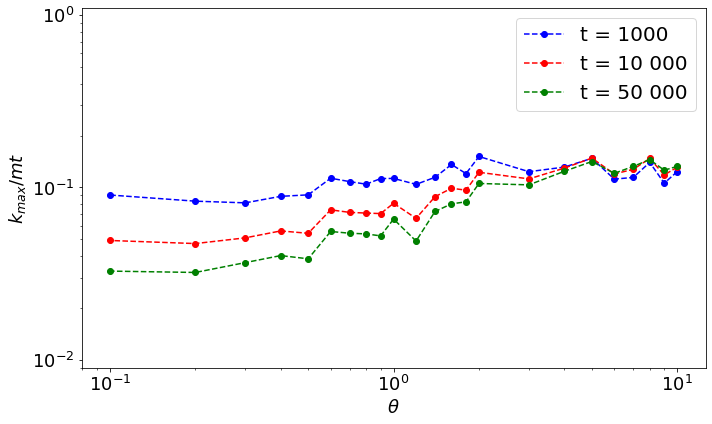

In [8]:
plt.figure(figsize=(10,6))
plt.loglog(data_frac_1000.keys(), [np.average(data_frac_1000[i]) for i in data_frac_1000.keys()], 'bo--', label='t = 1000')
plt.loglog(data_frac_10000.keys(), [np.average(data_frac_10000[i]) for i in data_frac_10000.keys()], 'ro--', label = 't = 10 000')
plt.loglog(data_frac_50000.keys(), [np.average(data_frac_50000[i]) for i in data_frac_50000.keys()], 'go--', label = 't = 50 000')
plt.legend(fontsize = 20)
plt.xlabel(r'$\theta$', fontsize = 18)
plt.ylabel('$k_{max}/mt$', fontsize = 18)
plt.ylim(top = 1.1)
plt.ylim(bottom = 0.009)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.tight_layout()
plt.savefig('../results/phase_transition.png', dpi=300)
plt.show()

##### Visualizing the distribution with different parameters

In [14]:
# Initialize a fitness value generator
generator = fitness.generator()

# Number of samples to generate
n_samples = 10000

In [15]:
theta_1 = 0.1

generator.set_current_distribution('be')
generator.set_param_be(theta_1)

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

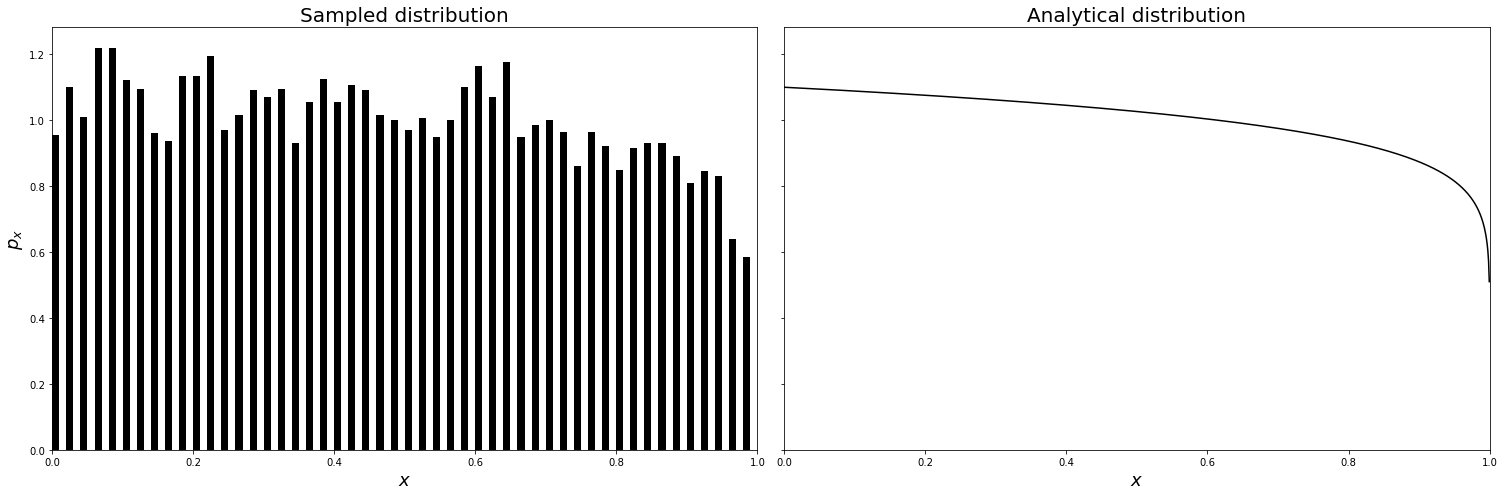

In [16]:
# Plot the distribution
fig, axs = plt.subplots(1,2, figsize=(21, 7), sharex=True, sharey=True)
_, bins_1,_ = axs[0].hist(y_samples, density=True, bins = 50, width=0.01, color = 'black')
axs[0].set_title('Sampled distribution', fontsize = 20)
axs[0].set_ylabel('$p_x$', fontsize=18)

axs[1].plot(np.linspace(0, max(bins_1), 1000), [(1+theta_1)*(1-x)**theta_1 for x in np.linspace(0, max(bins_1), 1000)], color = 'black')
axs[1].set_title('Analytical distribution', fontsize = 20)
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_xlabel('$x$', fontsize=18)

plt.tight_layout()
plt.show()

In [37]:
theta_2 = 1

generator.set_current_distribution('be')
generator.set_param_be(theta_2)

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

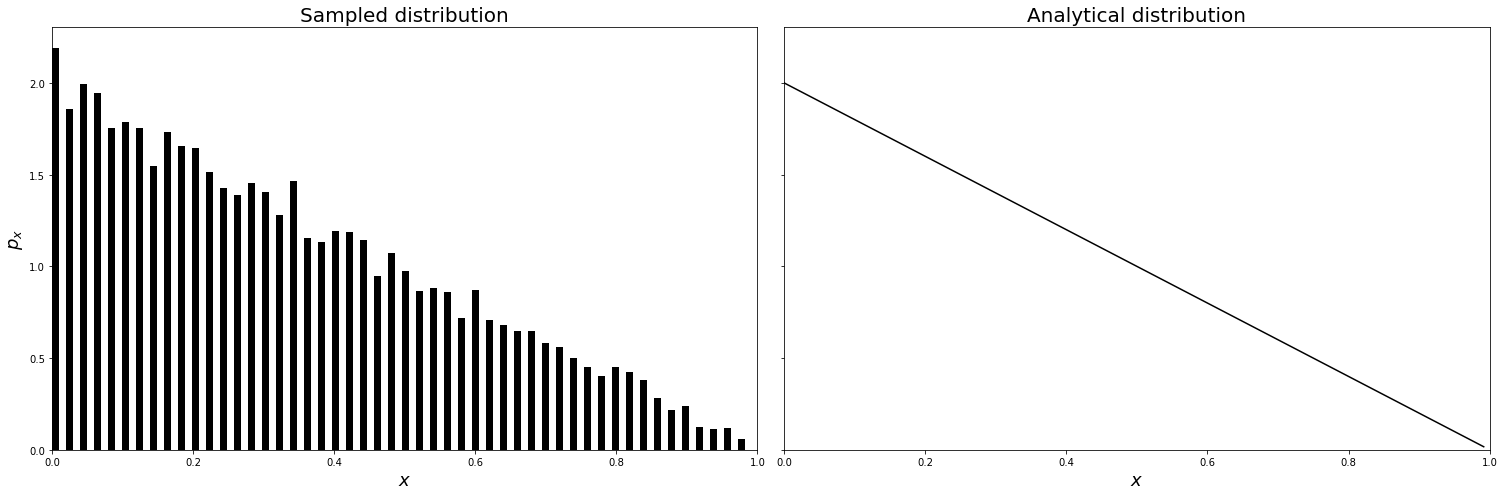

In [38]:
# Plot the distribution
fig, axs = plt.subplots(1,2, figsize=(21, 7), sharex=True, sharey=True)
_, bins_2,_ = axs[0].hist(y_samples, density=True, bins = 50, width=0.01, color = 'black')
axs[0].set_title('Sampled distribution', fontsize = 20)
axs[0].set_ylabel('$p_x$', fontsize=18)

axs[1].plot(np.linspace(0, max(bins_2), 1000), [(1+theta_2)*(1-x)**theta_2 for x in np.linspace(0, max(bins_2), 1000)], color = 'black')
axs[1].set_title('Analytical distribution', fontsize = 20)
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_xlabel('$x$', fontsize=18)

plt.tight_layout()
plt.show()

In [20]:
theta_3 = 10

generator.set_current_distribution('be')
generator.set_param_be(theta_3)

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

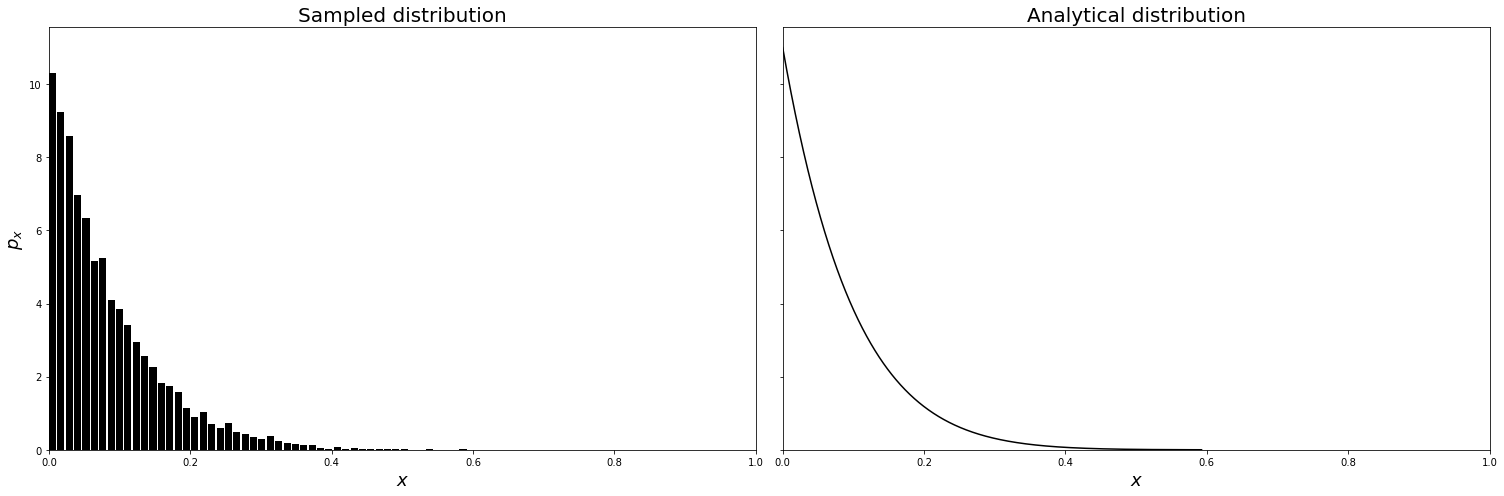

In [21]:
# Plot the distribution
fig, axs = plt.subplots(1,2, figsize=(21, 7), sharex=True, sharey=True)
_, bins_3,_ = axs[0].hist(y_samples, density=True, bins = 50, width=0.01, color = 'black')
axs[0].set_title('Sampled distribution', fontsize = 20)
axs[0].set_ylabel('$p_x$', fontsize=18)

axs[1].plot(np.linspace(0, max(bins_3), 1000), [(1+theta_3)*(1-x)**theta_3 for x in np.linspace(0, max(bins_3), 1000)], color = 'black')
axs[1].set_title('Analytical distribution', fontsize = 20)
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_xlabel('$x$', fontsize=18)

plt.tight_layout()
plt.show()

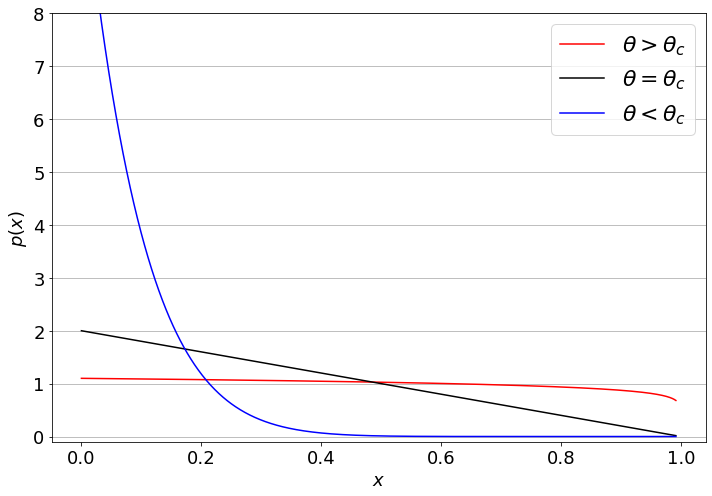

In [39]:
plt.figure(figsize=(10,7))
plt.plot(np.linspace(0, max(bins_2), 1000), [(1+theta_1)*(1-x)**theta_1 for x in np.linspace(0, max(bins_2), 1000)], color = 'red', label = r'$\theta > \theta_c$')
plt.plot(np.linspace(0, max(bins_2), 1000), [(1+theta_2)*(1-x)**theta_2 for x in np.linspace(0, max(bins_2), 1000)], color = 'black', label = r'$\theta = \theta_c$')
plt.plot(np.linspace(0, max(bins_2), 1000), [(1+theta_3)*(1-x)**theta_3 for x in np.linspace(0, max(bins_2), 1000)], color = 'blue', label = r'$\theta < \theta_c$')
plt.legend(fontsize = 22)
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$p(x)$', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(-0.1, 8)

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../results/distributions_phase_transition.png', dpi=300)
plt.show()